In [ ]:
import random
import hashlib
import numpy as np
from datasketch import MinHash, MinHashLSH

def generate_shingles(text, k=5):
    return set(text[i:i+k] for i in range(len(text) - k + 1))

def minhash(shingles, num_perm=128):
    m = MinHash(num_perm=num_perm)
    for shingle in shingles:
        m.update(shingle.encode('utf-8'))
    return m

def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# Пример использования
text1 = "MinHash is a probabilistic data structure for estimating the similarity between sets."
text2 = "MinHash is a technique for approximating the Jaccard similarity between sets."

shingles1 = generate_shingles(text1)
shingles2 = generate_shingles(text2)

m1 = minhash(shingles1)
m2 = minhash(shingles2)

print("Estimated Jaccard similarity:", m1.jaccard(m2))
print("True Jaccard similarity:", jaccard_similarity(shingles1, shingles2))

Estimated Jaccard similarity: 0.34375
True Jaccard similarity: 0.3508771929824561


In [ ]:
def evaluate_false_positive_rate(num_trials=1000, num_perm=128, threshold=0.5):
    false_positives = 0
    
    for _ in range(num_trials):
        # Генерация случайных множеств
        set1 = set(random.sample(range(1000), 100))
        set2 = set(random.sample(range(1000), 100))
        
        # Вычисление MinHash
        m1 = minhash(set1, num_perm)
        m2 = minhash(set2, num_perm)
        
        # Оценка схожести
        if m1.jaccard(m2) >= threshold and jaccard_similarity(set1, set2) < threshold:
            false_positives += 1
    
    return false_positives / num_trials

false_positive_rate = evaluate_false_positive_rate()
print("False positive rate:", false_positive_rate)

AttributeError: 'int' object has no attribute 'encode'

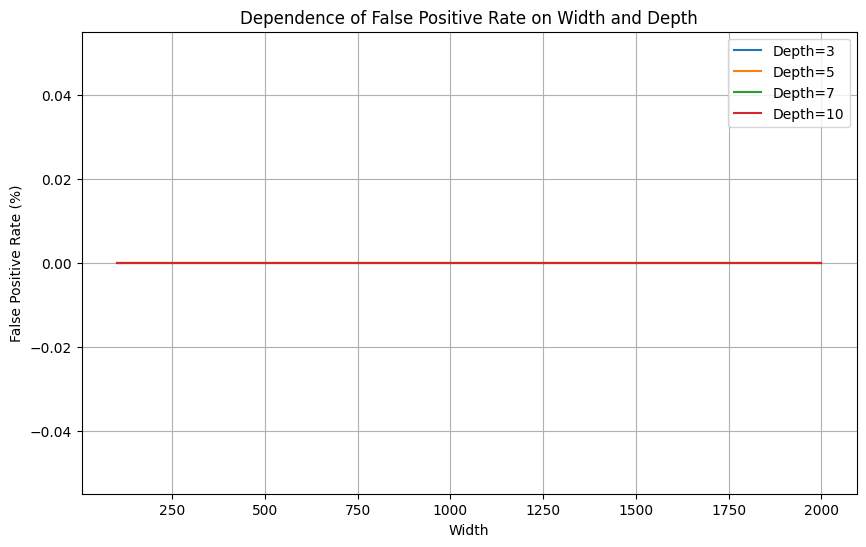

In [ ]:
import matplotlib.pyplot as plt

def evaluate_false_positive_rates(num_perms, thresholds, num_trials=1000):
    """Оценка ложноположительных срабатываний для разных гиперпараметров."""
    results = {}
    
    for num_perm in num_perms:
        for threshold in thresholds:
            rate = evaluate_false_positive_rate(num_trials, num_perm, threshold)
            results[(num_perm, threshold)] = rate
    
    return results

# Параметры для оценки
num_perms = [64, 128, 256, 512]
thresholds = [0.3, 0.5, 0.7]

# Оценка
results = evaluate_false_positive_rates(num_perms, thresholds)

# Построение таблицы
print("False Positive Rates:")
print("num_perm \\ threshold", end="")
for threshold in thresholds:
    print(f"\t{threshold}", end="")
print()

for num_perm in num_perms:
    print(f"{num_perm}", end="")
    for threshold in thresholds:
        print(f"\t{results[(num_perm, threshold)]:.4f}", end="")
    print()

# Построение графиков
for num_perm in num_perms:
    rates = [results[(num_perm, threshold)] for threshold in thresholds]
    plt.plot(thresholds, rates, label=f"num_perm={num_perm}")

plt.xlabel("Threshold")
plt.ylabel("False Positive Rate")
plt.legend()
plt.title("False Positive Rate vs Threshold for Different num_perm")
plt.show()